In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

import os

In [2]:
size = (120,120)

# Pre-processing

In [3]:
testPath = 'dataset/banana_out/test/'
trainPath = 'dataset/banana_out/train/'

testX = []
trainX = []

testY = []
trainY = []

fruits = os.listdir(testPath)
for fruit in fruits:
    images = os.listdir(testPath + "/" + fruit)
    for img in images:
        image = cv2.imread(testPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
        testX.append(image)
        testY.append(fruit)
        
fruits = os.listdir(trainPath)
for fruit in fruits:
    images = os.listdir(trainPath + "/" + fruit)
    for img in images:
        image = cv2.imread(trainPath + "/" + fruit + "/" + img)
        image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
        trainX.append(image)
        trainY.append(fruit)

testX = np.array(testX)
trainX = np.array(trainX)

testY = np.array(testY)
trainY = np.array(trainY)

In [4]:
trainX.shape

(1600, 120, 120, 3)

In [5]:
trainY.shape

(1600,)

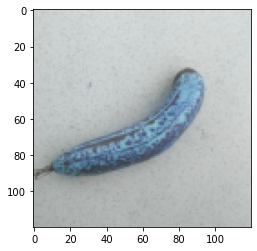

In [6]:
plt.imshow(testX[9])

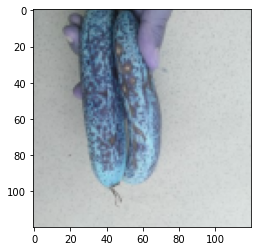

In [7]:
plt.imshow(testX[70])

### To GrayScale

In [10]:
def grayScale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    return gray

In [11]:
for i in range(len(testX)):
    testX[i] = grayScale(testX[i])

In [12]:
for i in range(len(trainX)):
    trainX[i] = grayScale(trainX[i])

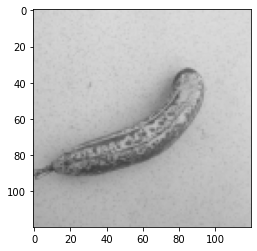

In [13]:
plt.imshow(testX[9])

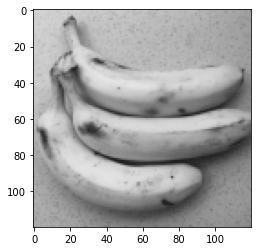

In [14]:
plt.imshow(testX[300])

In [15]:
testY[300]

'Banana_Good'

### Proccessing the image

In [16]:
# convert from integers to floats and normalize to range 0-1
norm_trainX = trainX.astype('float32')/255.0
norm_testX = testX.astype('float32')/255.0

In [17]:
norm_testX.shape

(400, 120, 120, 3)

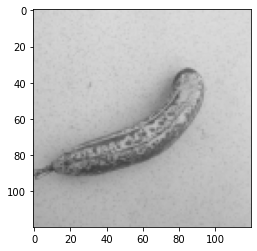

In [18]:
plt.imshow(testX[9])

In [19]:
# one hot encode target values
classes = dict()
i = 0

for index in range(len(testY)):
    if testY[index] not in classes.keys():
        classes[testY[index]] = i
        i+=1
    testY[index] = classes[testY[index]]
    
for index in range(len(trainY)):
    trainY[index] = classes[trainY[index]]

trainY = to_categorical(trainY)
testY = to_categorical(testY)

# CNN Model

In [20]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size + (3,))))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size + (3,))))

cnn.add(MaxPooling2D((2, 2)))

cnn.add(Flatten())

cnn.add(Dense(units=32, activation='relu')) #hidden layers

cnn.add(Dense(units=2, activation='softmax')) #output layer

# compile model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(x=norm_trainX, y=trainY, epochs=10)

Epoch 1/10
50/50 [==============================] - 8s 157ms/step - loss: 0.6338 - accuracy: 0.6625
Epoch 2/10
50/50 [==============================] - 9s 180ms/step - loss: 0.1538 - accuracy: 0.9464
Epoch 3/10
50/50 [==============================] - 10s 193ms/step - loss: 0.0960 - accuracy: 0.9628
Epoch 4/10
50/50 [==============================] - 9s 183ms/step - loss: 0.0609 - accuracy: 0.9819
Epoch 5/10
50/50 [==============================] - 12s 234ms/step - loss: 0.0393 - accuracy: 0.9822
Epoch 6/10
50/50 [==============================] - 10s 207ms/step - loss: 0.0181 - accuracy: 0.9966
Epoch 7/10
50/50 [==============================] - 9s 186ms/step - loss: 0.0076 - accuracy: 0.9980
Epoch 8/10
50/50 [==============================] - 9s 189ms/step - loss: 0.0125 - accuracy: 0.9951
Epoch 9/10
50/50 [==============================] - 8s 167ms/step - loss: 0.0101 - accuracy: 0.9989
Epoch 10/10
50/50 [==============================] - 11s 220ms/step - loss: 0.0079 - accuracy: 0.

In [21]:
cnn.save('banana_model')

INFO:tensorflow:Assets written to: banana_model\assets


In [22]:
classes

{'Banana_Bad': 0, 'Banana_Good': 1}

In [23]:
import numpy as np
from keras.preprocessing import image
print(classes)
d = dict()
for i in classes.keys():
    d[classes[i]] = i
print(d)
def testModel(path):
    #Reading the image
    test_image = cv2.imread(path)
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    print("Original Image: ")
    plt.imshow(test_image)
    plt.show()
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    print("Scaled Image: ")
    plt.imshow(test_image)
    plt.show()
    #To grayscale
    test_image = grayScale(test_image)
    print("Grayscale Image: ")
    plt.imshow(test_image)
    plt.show()
    # Normalize
    test_image = test_image.astype('float32')/255.0
    print("Normalized Image: ")
    plt.imshow(test_image)
    plt.show()
    
    prediction = cnn.predict(np.array([test_image]))
    result = np.argmax(prediction)
    print(result)
    print(d[result])

{'Banana_Bad': 0, 'Banana_Good': 1}
{0: 'Banana_Bad', 1: 'Banana_Good'}


In [ ]:
testModel('dataset/single_pred/apple_spoil1.jpg')

In [ ]:
testModel('dataset/single_pred/apple_spoil2.jpg')

In [ ]:
testModel('dataset/single_pred/apple_good1.jpg')

In [ ]:
testModel('dataset/single_pred/apple_good2.png')

In [ ]:
val_loss, val_acc = cnn.evaluate(norm_testX, testY)